In [1]:
import h5py
import os

import fenics as fe
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from tqdm import tqdm

import sys
sys.path.insert(0, "../scripts/")

from ns_2d import NSTwo

fe.set_log_level(40)

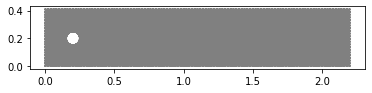

In [2]:
mesh = "../mesh/featflow-2d-3-benchmark.xdmf"
ns = NSTwo(mesh, dict(dt=1/1600, theta=0.5, setup="feat"))
fe.plot(ns.mesh)
plt.show()

ns.setup_form()

In [ ]:
t = 0.
t_final = 0.2
nt = int((t_final - t) / ns.dt)
for i in range(nt):
    t += ns.dt
    ns.solve(t)

  0 KSP preconditioned resid norm 1.786798814598e-03 true resid norm 1.742429026085e-03 ||r(i)||/||b|| 1.000000000000e+00
  1 KSP preconditioned resid norm 6.865940711407e-05 true resid norm 1.284671720009e-05 ||r(i)||/||b|| 7.372878325466e-03
  2 KSP preconditioned resid norm 7.828033430676e-06 true resid norm 1.084926670494e-05 ||r(i)||/||b|| 6.226518579820e-03
  3 KSP preconditioned resid norm 7.059390831489e-07 true resid norm 1.081794843686e-05 ||r(i)||/||b|| 6.208544666618e-03
  4 KSP preconditioned resid norm 6.374479470283e-08 true resid norm 1.081788344182e-05 ||r(i)||/||b|| 6.208507365216e-03
  5 KSP preconditioned resid norm 6.659207200131e-09 true resid norm 1.081785774029e-05 ||r(i)||/||b|| 6.208492614815e-03
  6 KSP preconditioned resid norm 7.543488648575e-10 true resid norm 1.081785905292e-05 ||r(i)||/||b|| 6.208493368147e-03
  7 KSP preconditioned resid norm 8.099565286798e-11 true resid norm 1.081785883193e-05 ||r(i)||/||b|| 6.208493241318e-03
KSP Object: 1 MPI proces

In [ ]:
u, p = fe.split(ns.du)
u, v = fe.split(u)

fe.plot(u)
plt.show()

In [ ]:
fe.plot(ns.u_in, mesh=ns.mesh)
plt.show()

In [ ]:
p((0.15, 0.2)) - p((0.25, 0.2))